<a href="https://colab.research.google.com/github/Nallin-kumar/ML_Algos/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load SMS Spam Dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# Step 3: Basic Data Inspection
print("Dataset Size:", df.shape)
print(df['label'].value_counts())
print(df.head())


Dataset Size: (5572, 2)
label
ham     4825
spam     747
Name: count, dtype: int64
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [9]:
# Step 4: Split Data into Training and Testing Sets
X = df['message']
y = df['label']

# Use stratify to keep balance of ham/spam
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [10]:
# Step 5: Vectorize Text Data
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Step 6: Train Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train_counts, y_train)


MultinomialNB()

In [11]:
# Step 7: Predictions and Evaluation
y_pred = model.predict(X_test_counts)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed Metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.986244019138756

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1448
        spam       0.98      0.92      0.95       224

    accuracy                           0.99      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672



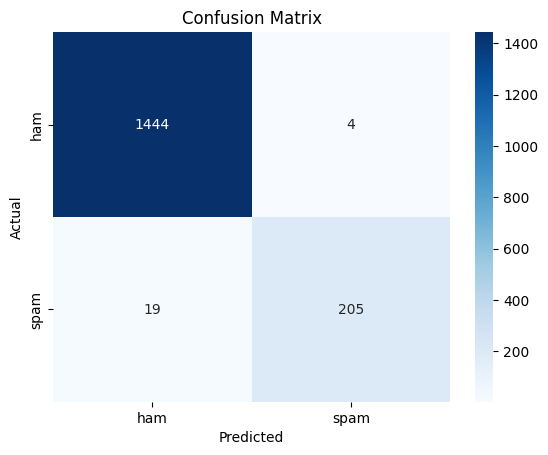

In [12]:
# Step 8: Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['ham', 'spam'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [13]:
# Step 9: Try Your Own Message
sample = ["Congratulations! You've won a free cruise. Click here to claim."]
sample_counts = vectorizer.transform(sample)
print("Prediction:", model.predict(sample_counts)[0])


Prediction: spam
